# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to HTML, all the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.

---
### Why We're Here

Photo sharing and photo storage services like to have location data for each photo that is uploaded. With the location data, these services can build advanced features, such as automatic suggestion of relevant tags or automatic photo organization, which help provide a compelling user experience. Although a photo's location can often be obtained by looking at the photo's metadata, many photos uploaded to these services will not have location metadata available. This can happen when, for example, the camera capturing the picture does not have GPS or if a photo's metadata is scrubbed due to privacy concerns.

If no location metadata for an image is available, one way to infer the location is to detect and classify a discernable landmark in the image. Given the large number of landmarks across the world and the immense volume of images that are uploaded to photo sharing services, using human judgement to classify these landmarks would not be feasible.

In this notebook, you will take the first steps towards addressing this problem by building models to automatically predict the location of the image based on any landmarks depicted in the image. At the end of this project, your code will accept any user-supplied image as input and suggest the top k most relevant landmarks from 50 possible landmarks from across the world. The image below displays a potential sample output of your finished project.

![Sample landmark classification output](images/sample_landmark_output.png)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Download Datasets and Install Python Modules
* [Step 1](#step1): Create a CNN to Classify Landmarks (from Scratch)
* [Step 2](#step2): Create a CNN to Classify Landmarks (using Transfer Learning)
* [Step 3](#step3): Write Your Landmark Prediction Algorithm

---
<a id='step0'></a>
## Step 0: Download Datasets and Install Python Modules

**Note: if you are using the Udacity workspace, *YOU CAN SKIP THIS STEP*. The dataset can be found in the `/data` folder and all required Python modules have been installed in the workspace.**

Download the [landmark dataset](https://udacity-dlnfd.s3-us-west-1.amazonaws.com/datasets/landmark_images.zip).
Unzip the folder and place it in this project's home directory, at the location `/landmark_images`.

Install the following Python modules:
* cv2
* matplotlib
* numpy
* PIL
* torch
* torchvision

---

<a id='step1'></a>
## Step 1: Create a CNN to Classify Landmarks (from Scratch)

In this step, you will create a CNN that classifies landmarks.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 20%.

Although 20% may seem low at first glance, it seems more reasonable after realizing how difficult of a problem this is. Many times, an image that is taken at a landmark captures a fairly mundane image of an animal or plant, like in the following picture.

<img src="images/train/00.Haleakala_National_Park/084c2aa50d0a9249.jpg" alt="Bird in Haleakalā National Park" style="width: 400px;"/>

Just by looking at that image alone, would you have been able to guess that it was taken at the Haleakalā National Park in Hawaii?

An accuracy of 20% is significantly better than random guessing, which would provide an accuracy of just 2%. In Step 2 of this notebook, you will have the opportunity to greatly improve accuracy by using transfer learning to create a CNN.

Remember that practice is far ahead of theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

**Note**: Remember that the dataset can be found at `/data/landmark_images/` in the workspace.

All three of your data loaders should be accessible via a dictionary named `loaders_scratch`. Your train data loader should be at `loaders_scratch['train']`, your validation data loader should be at `loaders_scratch['valid']`, and your test data loader should be at `loaders_scratch['test']`.

You may find [this documentation on custom datasets](https://pytorch.org/docs/stable/torchvision/datasets.html#datasetfolder) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes
import torch
import numpy as np
from torchvision import datasets,models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

#
num_workers = 0
batch_size = 32
valid_size = 0.2
#transformations 64*64
transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

#datasets
train_data = datasets.ImageFolder('/data/landmark_images/train',transform=transform)
test_data  = datasets.ImageFolder('/data/landmark_images/test',transform=transform)

# train/val split
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

# specify the image classes
classes = test_data.classes
print(classes)
loaders_scratch = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


['00.Haleakala_National_Park', '01.Mount_Rainier_National_Park', '02.Ljubljana_Castle', '03.Dead_Sea', '04.Wroclaws_Dwarves', '05.London_Olympic_Stadium', '06.Niagara_Falls', '07.Stonehenge', '08.Grand_Canyon', '09.Golden_Gate_Bridge', '10.Edinburgh_Castle', '11.Mount_Rushmore_National_Memorial', '12.Kantanagar_Temple', '13.Yellowstone_National_Park', '14.Terminal_Tower', '15.Central_Park', '16.Eiffel_Tower', '17.Changdeokgung', '18.Delicate_Arch', '19.Vienna_City_Hall', '20.Matterhorn', '21.Taj_Mahal', '22.Moscow_Raceway', '23.Externsteine', '24.Soreq_Cave', '25.Banff_National_Park', '26.Pont_du_Gard', '27.Seattle_Japanese_Garden', '28.Sydney_Harbour_Bridge', '29.Petronas_Towers', '30.Brooklyn_Bridge', '31.Washington_Monument', '32.Hanging_Temple', '33.Sydney_Opera_House', '34.Great_Barrier_Reef', '35.Monumento_a_la_Revolucion', '36.Badlands_National_Park', '37.Atomium', '38.Forth_Bridge', '39.Gateway_of_India', '40.Stockholm_City_Hall', '41.Machu_Picchu', '42.Death_Valley_National_Pa

**Question 1:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?

**Answer**: my code resize the images for two reasons. first the images as provided are of varied sizes and need to be of one size for the input tensor. Second the code resizes the images to a much smaller size of 64*64 for quicker computation while still keeping enough image featuresalso i went with power of 2 for my sizing. initially I went with 128 but through experimentation found that 128 takes too much time to traning, 32 losses the image feature and 64 was good middle ground for feature preserving and training speed

as for transformation I went only with the necessary resize, to tensor and normalization as advised by session instructor as adding more augmentation will make the problem harder and slows training. some augmentation like center-crop can be added with no big impact on the code speed and model accuracy but is opt-out of doing so.

### (IMPLEMENTATION) Visualize a Batch of Training Data

Use the code cell below to retrieve a batch of images from your train data loader, display at least 5 images simultaneously, and label each displayed image with its class name (e.g., "Golden Gate Bridge").

Visualizing the output of your data loader is a great way to ensure that your data loading and preprocessing are working as expected.

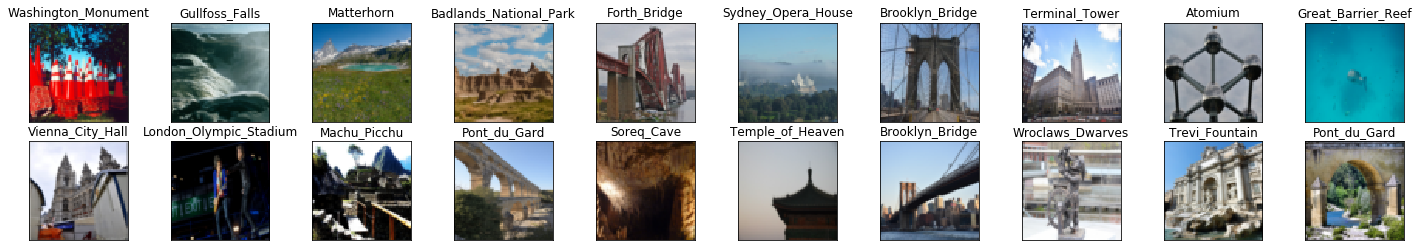

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

## TODO: visualize a batch of the train data loader

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

'''this code is really the same as the one in the course videos since I do not know how to use plt well'''
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))

dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]][3:])

### Initialize use_cuda variable

In [10]:
# useful variable that tells us whether we should use the GPU
use_cuda = torch.cuda.is_available()
print(use_cuda)

True


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and fill in the function `get_optimizer_scratch` below.

In [11]:
## TODO: select loss function
import torch.nn as nn
import torch.optim as optim

criterion_scratch = nn.CrossEntropyLoss()

def get_optimizer_scratch(model):
    ## TODO: select and return an optimizer
    '''lr between 0.1 to 0.15 is good range'''
    return optim.SGD(model.parameters(), lr=0.15)
    
    

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify images of landmarks.  Use the template in the code cell below.

In [12]:
import torch.nn as nn
import torch.nn.functional as F
# define the CNN architecture
class Net(nn.Module):
    ## TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv0 = nn.Conv2d(3, 16, 3, padding=1)
        self.conv1 = nn.Conv2d(16, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        # linear layers
        self.fc1 = nn.Linear(128 * 4 * 4, 1024)
        self.fc2 = nn.Linear(1024, 50)
        self.dropout = nn.Dropout(0.50)
        
    def forward(self, x):
        ## Define forward behavior
        x = self.pool(F.relu(self.conv0(x)))
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# Do NOT modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print(model_scratch)

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv1): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=50, bias=True)
  (dropout): Dropout(p=0.5)
)


__Question 2:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__  the main thing i considered when making the CNN is training speed since I started the project on my pc so i did not want a lot of layers in the CNN and my session instructor also said that one does not need a big CNN to get good results. so in the start i went with 3 conv2d from 3 to 64 filter but added one more to get total 128 filter in the end. as for the linear layer i went with 2 since having just one 2048 -> 50 seems ineffective in my point if view and more than 2 layers according to my instructor is enough for such small CNN. while this answer is the boiled down version of what i did a lot of trial and error was undertaken to get the final CNN

### (IMPLEMENTATION) Implement the Training Algorithm

Implement your training algorithm in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at the filepath stored in the variable `save_path`.

In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        # set the module to training mode
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            train_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - train_loss))


        ######################    
        # validate the model #
        ######################
        # set the model to evaluation mode
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()

            ## TODO: update average validation loss 
            output = model(data)
            loss = criterion(output, target)
            valid_loss += ((1 / (batch_idx + 1)) * (loss.data.item() - valid_loss))

        #average out the losses
        train_loss = train_loss/len(train_loader.sampler)
        valid_loss = valid_loss/len(valid_loader.sampler)

        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))

        ## TODO: if the validation loss has decreased, save the model at the filepath stored in save_path
        if valid_loss <= valid_loss_min:
            print('Validation loss decreased.Saving model')
            torch.save(model.state_dict(),save_path)
            valid_loss_min = valid_loss
    
    return model

### (IMPLEMENTATION) Experiment with the Weight Initialization

Use the code cell below to define a custom weight initialization, and then train with your weight initialization for a few epochs. Make sure that neither the training loss nor validation loss is `nan`.

Later on, you will be able to see how this compares to training with PyTorch's default weight initialization.

In [7]:
const = 0 #set to false/0 for rand uniform or true/1 for constant
w = 10 # constant weight / uni-dis range 
def custom_weight_init(m):
    ## TODO: implement a weight initialization strategy
    classname = m.__class__.__name__
    if const:
        if classname.find('Linear') != -1:
            m.weight.data.fill_(const_w)
            m.bias.data.fill_(const_w)
        if classname.find('Conv2d') != -1:
            m.weight.data.fill_(const_w)
    else:
        if classname.find('Linear') != -1:
            m.weight.data.uniform_(-w,w)
            m.bias.data.uniform_(-w,w)
        if classname.find('Conv2d') != -1:
            m.weight.data.uniform_(-w,w)
        
#-#-# Do NOT modify the code below this line. #-#-#
model_scratch.apply(custom_weight_init)
# print pramameter loop
#for param in model_scratch.parameters(): print(param.data)
model_scratch = train(20, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch),criterion_scratch, use_cuda, 'ignore.pt')

Epoch: 1 	Training Loss: 2133171.388149 	Validation Loss: 0.009196
Validation loss decreased.Saving model
Epoch: 2 	Training Loss: 0.002134 	Validation Loss: 0.008225
Validation loss decreased.Saving model
Epoch: 3 	Training Loss: 0.001934 	Validation Loss: 0.007631
Validation loss decreased.Saving model
Epoch: 4 	Training Loss: 0.001770 	Validation Loss: 0.006950
Validation loss decreased.Saving model
Epoch: 5 	Training Loss: 0.001632 	Validation Loss: 0.006436
Validation loss decreased.Saving model
Epoch: 6 	Training Loss: 0.001518 	Validation Loss: 0.006038
Validation loss decreased.Saving model
Epoch: 7 	Training Loss: 0.001426 	Validation Loss: 0.005698
Validation loss decreased.Saving model
Epoch: 8 	Training Loss: 0.001352 	Validation Loss: 0.005448
Validation loss decreased.Saving model
Epoch: 9 	Training Loss: 0.001291 	Validation Loss: 0.005176
Validation loss decreased.Saving model
Epoch: 10 	Training Loss: 0.001240 	Validation Loss: 0.004968
Validation loss decreased.Saving

### (IMPLEMENTATION) Train and Validate the Model

Run the next code cell to train your model.

In [8]:
## TODO: you may change the number of epochs if you'd like,
## but changing it is not required
num_epochs = 20 #100 epochs is way too much, 20 to 10 is far more suitable

#-#-# Do NOT modify the code below this line. #-#-#

# function to re-initialize a model with pytorch's default weight initialization
def default_weight_init(m):
    reset_parameters = getattr(m, 'reset_parameters', None)
    if callable(reset_parameters):
        m.reset_parameters()

# reset the model parameters
model_scratch.apply(default_weight_init)

# train the model
model_scratch = train(num_epochs, loaders_scratch, model_scratch, get_optimizer_scratch(model_scratch), 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

Epoch: 1 	Training Loss: 0.000979 	Validation Loss: 0.003919
Validation loss decreased.Saving model
Epoch: 2 	Training Loss: 0.000976 	Validation Loss: 0.003852
Validation loss decreased.Saving model
Epoch: 3 	Training Loss: 0.000952 	Validation Loss: 0.003730
Validation loss decreased.Saving model
Epoch: 4 	Training Loss: 0.000935 	Validation Loss: 0.003674
Validation loss decreased.Saving model
Epoch: 5 	Training Loss: 0.000919 	Validation Loss: 0.003632
Validation loss decreased.Saving model
Epoch: 6 	Training Loss: 0.000896 	Validation Loss: 0.003412
Validation loss decreased.Saving model
Epoch: 7 	Training Loss: 0.000882 	Validation Loss: 0.003385
Validation loss decreased.Saving model
Epoch: 8 	Training Loss: 0.000846 	Validation Loss: 0.003342
Validation loss decreased.Saving model
Epoch: 9 	Training Loss: 0.000820 	Validation Loss: 0.003265
Validation loss decreased.Saving model
Epoch: 10 	Training Loss: 0.000792 	Validation Loss: 0.003104
Validation loss decreased.Saving model

### (IMPLEMENTATION) Test the Model

Run the code cell below to try out your model on the test dataset of landmark images. Run the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 20%.

In [14]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    # set the module to evaluation mode
    model.eval()

    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data.item() - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 2.712013


Test Accuracy: 32% (404/1250)


---
<a id='step2'></a>
## Step 2: Create a CNN to Classify Landmarks (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify landmarks from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Landmark Dataset

Use the code cell below to create three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader): one for training data, one for validation data, and one for test data. Randomly split the images located at `landmark_images/train` to create the train and validation data loaders, and use the images located at `landmark_images/test` to create the test data loader.

All three of your data loaders should be accessible via a dictionary named `loaders_transfer`. Your train data loader should be at `loaders_transfer['train']`, your validation data loader should be at `loaders_transfer['valid']`, and your test data loader should be at `loaders_transfer['test']`.

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [15]:
### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

#assuming that the imports were done in past cells
'''import torch
import numpy as np
from torchvision import datasets,models
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler'''

#the following code is written similar as the course videos and provided notebooks
num_workers = 0
batch_size = 32
valid_size = 0.2
'''transformations change size to 224*224 for vgg16'''
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

#datasets
train_data = datasets.ImageFolder('/data/landmark_images/train',transform=transform)
test_data  = datasets.ImageFolder('/data/landmark_images/test',transform=transform)

# train/val split
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

#dataloaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,sampler=train_sampler, num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, sampler=valid_sampler, num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, num_workers=num_workers)

classes = train_data.classes
#print(classes)
loaders_transfer = {'train': train_loader, 'valid': valid_loader, 'test': test_loader}


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_transfer`, and fill in the function `get_optimizer_transfer` below.

In [16]:
## TODO: select loss function
criterion_transfer = nn.CrossEntropyLoss()

def get_optimizer_transfer(model):
    ## TODO: select and return optimizer
    #need very low lr since vgg16 layer are mostly trained and just need to train the last layer classifier 
    return optim.SGD(model.classifier[6].parameters(), lr=0.001)

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify images of landmarks.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [17]:
## TODO: Specify model architecture

model_transfer = models.vgg16(pretrained=True)
#freeze the conv/feature layers
for param in model_transfer.features.parameters():
    param.requires_grad = False
model_transfer.classifier[6] = nn.Linear(model_transfer.classifier[6].in_features, 50)
#print(model_transfer)

#-#-# Do NOT modify the code below this line. #-#-#

if use_cuda:
    model_transfer = model_transfer.cuda()

__Question 3:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__  I went with VGG CNNs after a discussion with my session instructor we found that VGG is has sufficiently similar dataset. since VGG was similar and the dataset was larger than ours I used EndCoV method and went with VGG16 since it was small enough to not take huge time training and would still give good results.

As for how I modified it I simply kept all put the last classifier layer and froze the weights of the conv layers also i replaced the last classifier layer out channel with the number of the landmarks dataset classes.

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [13]:
# TODO: train the model and save the best model parameters at filepath 'model_transfer.pt'
#very much the same code as the from scratch except it is with moded vgg16
num_epochs = 20
train(num_epochs, loaders_transfer, model_transfer, get_optimizer_transfer(model_transfer), criterion_transfer, use_cuda, 'model_transfer.pt')

#-#-# Do NOT modify the code below this line. #-#-#
# load the model that got the best validation accuracy
model_transfer.load_state_dict(torch.load('model_transfer.pt'))

Epoch: 1 	Training Loss: 0.000948 	Validation Loss: 0.003512
Validation loss decreased.Saving model
Epoch: 2 	Training Loss: 0.000836 	Validation Loss: 0.003148
Validation loss decreased.Saving model
Epoch: 3 	Training Loss: 0.000749 	Validation Loss: 0.002864
Validation loss decreased.Saving model
Epoch: 4 	Training Loss: 0.000683 	Validation Loss: 0.002661
Validation loss decreased.Saving model
Epoch: 5 	Training Loss: 0.000633 	Validation Loss: 0.002471
Validation loss decreased.Saving model
Epoch: 6 	Training Loss: 0.000592 	Validation Loss: 0.002336
Validation loss decreased.Saving model
Epoch: 7 	Training Loss: 0.000558 	Validation Loss: 0.002213
Validation loss decreased.Saving model
Epoch: 8 	Training Loss: 0.000531 	Validation Loss: 0.002131
Validation loss decreased.Saving model
Epoch: 9 	Training Loss: 0.000507 	Validation Loss: 0.002052
Validation loss decreased.Saving model
Epoch: 10 	Training Loss: 0.000486 	Validation Loss: 0.001982
Validation loss decreased.Saving model

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [18]:
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.494581


Test Accuracy: 69% (869/1250)


---
<a id='step3'></a>
## Step 3: Write Your Landmark Prediction Algorithm

Great job creating your CNN models! Now that you have put in all the hard work of creating accurate classifiers, let's define some functions to make it easy for others to use your classifiers.

### (IMPLEMENTATION) Write Your Algorithm, Part 1

Implement the function `predict_landmarks`, which accepts a file path to an image and an integer k, and then predicts the **top k most likely landmarks**. You are **required** to use your transfer learned CNN from Step 2 to predict the landmarks.

An example of the expected behavior of `predict_landmarks`:
```
>>> predicted_landmarks = predict_landmarks('example_image.jpg', 3)
>>> print(predicted_landmarks)
['Golden Gate Bridge', 'Brooklyn Bridge', 'Sydney Harbour Bridge']
```

In [19]:
import cv2
from PIL import Image
from torch.autograd import Variable as var

## the class names can be accessed at the `classes` attribute
## of your dataset object (e.g., `train_dataset.classes`)

'''I am assuming that cuda is used'''
#standard transformation and resize to 224*224 for vgg standard
trans = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

#the following function img_load was 
def img_load(img_path):
    img = Image.open(img_path)
    img = var(trans(img).float(), requires_grad=True)
    img = img.unsqueeze(0) # through my search this is needed for vgg cnns 
    return img.cuda()

def predict_landmarks(img_path, k):
    ## TODO: return the names of the top k landmarks predicted by the transfer learned CNN
    data=img_load(img_path)   
    model_transfer.eval()
    output = model_transfer(data).cpu().detach().numpy() # need .cpu().detach().numpy() to get the output out the gpu to numpy
    indexes = np.argpartition(output[0],k)[:k] #get indexes for top k landmarks
    places = []
    for ind in indexes:
        places.append(classes[ind][3:].replace('_'," "))
    return places

# test on a sample image
predict_landmarks('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg', 5)

['Wroclaws Dwarves',
 'Stonehenge',
 'Great Barrier Reef',
 'Seattle Japanese Garden',
 'Trevi Fountain']

### (IMPLEMENTATION) Write Your Algorithm, Part 2

In the code cell below, implement the function `suggest_locations`, which accepts a file path to an image as input, and then displays the image and the **top 3 most likely landmarks** as predicted by `predict_landmarks`.

Some sample output for `suggest_locations` is provided below, but feel free to design your own user experience!
![](images/sample_landmark_output.png)

Is this the Picture of:
1-Wroclaws Dwarves
2-Stonehenge
3-Great Barrier Reef


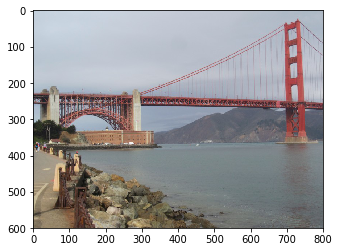

In [20]:
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
def suggest_locations(img_path):
    # get landmark predictions
    predicted_landmarks = predict_landmarks(img_path, 3)
    ## TODO: display image and display landmark predictions
    img = plt_img.imread(img_path)
    img = plt.imshow(img)
    # I am to tired to add text to the pic itself
    print("Is this the Picture of:")
    for i in range(len(predicted_landmarks)):
        print (str((i+1))+"-"+str(predicted_landmarks[i]))

# test on a sample image
suggest_locations('images/test/09.Golden_Gate_Bridge/190f3bae17c32c37.jpg')

### (IMPLEMENTATION) Test Your Algorithm

Test your algorithm by running the `suggest_locations` function on at least four images on your computer. Feel free to use any images you like.

__Question 4:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ (Three possible points for improvement)

The output on test seemed promising with 70+% but when doing the Algorithm it did not classify any of the 5 images correctly. I expected the such results to be honest

there is 2 main point of improvement that can be done:

1- add more landmark class the dataset is really small with 50 class
2- the sample per class are really low need way more images per class to get better result since the task is difficult and the images of landmark can be rather unclear of the landmark it self

the last point is simple
3- deeper/bigger CNN architecture with a lot more training will do better but due to the time needed for training it will take long time to train and test

Is this the Picture of:
1-Prague Astronomical Clock
2-Vienna City Hall
3-Gateway of India


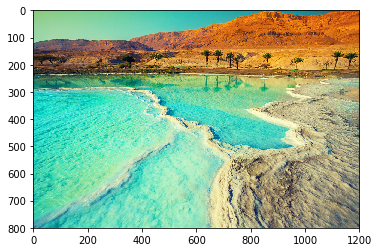

In [21]:
## TODO: Execute the `suggest_locations` function on
## at least 4 images on your computer.
## Feel free to use as many code cells as needed.
suggest_locations('Dead-sea.jpg')

Is this the Picture of:
1-Great Barrier Reef
2-Moscow Raceway
3-Washington Monument


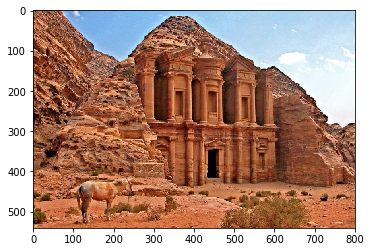

In [22]:
suggest_locations('Petra.jpg')

Is this the Picture of:
1-Soreq Cave
2-Gullfoss Falls
3-Externsteine


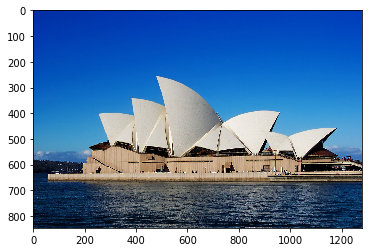

In [23]:
suggest_locations('Sydney_Opera_House.jpg')

Is this the Picture of:
1-Terminal Tower
2-Moscow Raceway
3-London Olympic Stadium


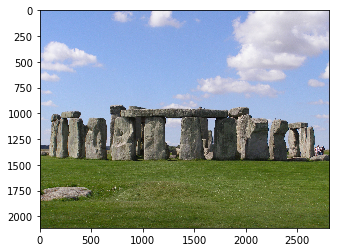

In [24]:
suggest_locations('Stonehenge.jpg')

Is this the Picture of:
1-Wroclaws Dwarves
2-Kantanagar Temple
3-Prague Astronomical Clock


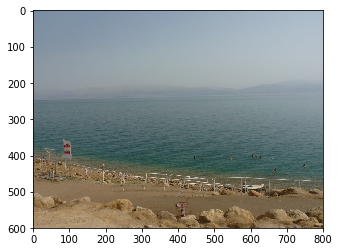

In [25]:
suggest_locations('/data/landmark_images/train/03.Dead_Sea/0a14dfa30efe67ab.jpg')